<a href="https://colab.research.google.com/github/RendiZein/Metode-Rekayasa-Komputasi/blob/main/RK_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necesarry library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import timedelta

# Main code

Improvement :
1. Rapikan setiap fungsi dengan membuat fungsi yang terdapat option untuk menampilkan grafik atau tidak
2. Ganti y_p dengan y

## Nomor 7

Analsisis :
1. RK 4 memiliki nilai

### bagian a


In [ ]:
def rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=2):
  #defined variable
  start_time = time.monotonic()
   #delta time
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j+1], y[j]+k1[j+1]*dt)#calculate k2
      y[j+1]=y[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y_t,y,e,k1,k2)),
                  columns =['t','y true','y pred','error(%)','k1','k2'])
    display(df)
    plt.plot(t, y, '0.8', label='Euler Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y true,y pred,error(%),k1,k2
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000
1,0.02,4.940596,4.940600,0.000081,-3.000000,-2.940000
2,0.04,4.882368,4.882376,0.000160,-2.940600,-2.881788
3,0.06,4.825294,4.825305,0.000238,-2.882376,-2.824729
4,0.08,4.769349,4.769364,0.000314,-2.825305,-2.768799
5,0.10,4.714512,4.714531,0.000390,-2.769364,-2.713977
6,0.12,4.660761,4.660783,0.000464,-2.714531,-2.660240
7,0.14,4.608075,4.608099,0.000536,-2.660783,-2.607567
8,0.16,4.556431,4.556459,0.000608,-2.608099,-2.555937
9,0.18,4.505811,4.505841,0.000677,-2.556459,-2.505330


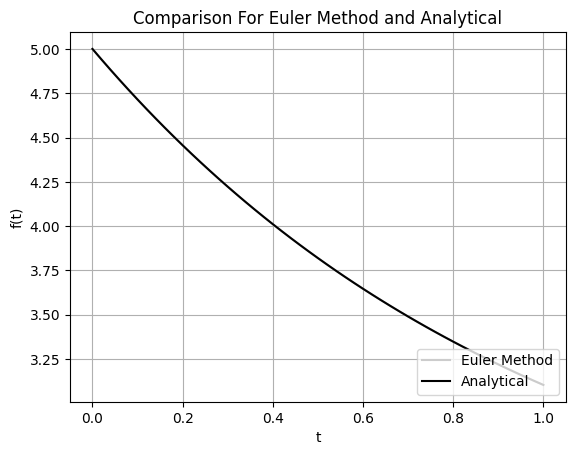

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001415


In [ ]:
rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=2)

### Bagian B

In [ ]:
def rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j]+dt/2, y[j]+k1[j+1]*dt/2)#calculate k2
      k3[j+1]=f(t[j]+dt/2, y[j]+k2[j+1]*dt/2)#calculate k2#calculate k3
      k4[j+1]=f(t[j+1], y[j]+k3[j+1]*dt)#calculate k2#calculate k3#calculate k4
      y[j+1]=y[j]+(k1[j+1]+2*k2[j+1]+2*k3[j+1]+k4[j+1])*dt/6 #calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y,e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2,k3,k4)),
                  columns =['t','y pred', 'y true', 'error(%)','k1','k2','k3','k4'])
    display(df)
    plt.plot(t, y, 'bo--', label='RKO4 Method')
    plt.plot(t, y_t, 'g', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


,t,y pred,y true,error(%),k1,k2,k3,k4
0,0.00,5.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.02,4.940596,4.940596,1.613863e-09,-3.000000,-2.970000,-2.970300,-2.940594
2,0.04,4.882368,4.882368,3.201531e-09,-2.940596,-2.911190,-2.911484,-2.882366
3,0.06,4.825294,4.825294,4.762887e-09,-2.882368,-2.853545,-2.853833,-2.825292
4,0.08,4.769349,4.769349,6.297765e-09,-2.825294,-2.797041,-2.797323,-2.769347
5,0.10,4.714512,4.714512,7.806078e-09,-2.769349,-2.741656,-2.741932,-2.714510
6,0.12,4.660761,4.660761,9.287704e-09,-2.714512,-2.687367,-2.687639,-2.660759
7,0.14,4.608075,4.608075,1.074254e-08,-2.660761,-2.634154,-2.634420,-2.608073
8,0.16,4.556431,4.556431,1.217048e-08,-2.608075,-2.581994,-2.582255,-2.556430
9,0.18,4.505811,4.505811,1.357145e-08,-2.556431,-2.530867,-2.531123,-2.505809


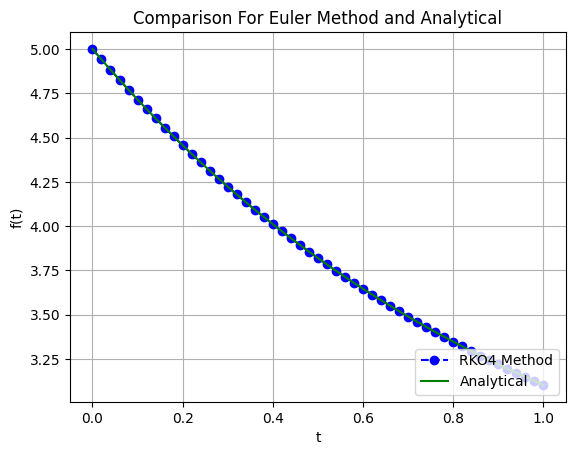

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.000859


In [ ]:
rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=2)

### Bagian C

#### additional function

##### Euler Modified Single

In [ ]:
#defined variable
def modified_euler_ordinary_differential_equations_single_order_1(dt=0.1, eps=1.0, pr=2):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    ep = np.zeros(len(t))
    k = np.zeros(len(t))
    yp=np.zeros(len(t))
    dif=np.zeros(len(t))
    dif_p=np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    k[0]=0

    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_k
        yp[j+1]=y[j]+f(t[j], y[j])*dt
        ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
        yk = [y[j]+(f(t[j], y[j])+f(t[j+1], yp[j+1]))*dt*0.5] # inisiasi y korektor
        e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
        dif[j+1]=np.abs(yk[-1]-yp[j+1])
        while dif[j+1]>eps:
          yk.append(y[j]+(f(t[j], y[j])+f(t[j+1], yk[-1]))*dt*0.5)
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
          dif[j+1]=np.abs(yk[-1]-yk[-2])

        k[j+1]=len(yk)
        y[j+1]=yk[-1]
        ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100

        #calculate error
        # e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)
    if pr==1:
      return t, y_t, y, e, ep, delta_time
    else:
      df = pd.DataFrame(list(zip(t, y,yp, y_t, dif, e,ep, k)),
                    columns =['t','y','y_pred', 'y true','dif', 'error(%)','error_p(%)', 'n_kor'])
      display(df)
      plt.plot(t, y, '0.7', label='Euler Method')
      plt.plot(t, y_t, 'k', label='Analytical')
      plt.title('Comparison For Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


##### Euler Single

In [ ]:
#defined variable
def euler_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_pred
        y[j+1]=y[j]+f(t[j], y[j])*dt
        #calculate error
        e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)
    if pr==1:
      return t, y_t, y, e, delta_time
    else :
      df = pd.DataFrame(list(zip(t, y, y_t, e)),
                  columns =['t','y pred', 'y true', 'error(%)'])
      display(df)
      plt.plot(t, y, '0.8', label='Euler Method')
      plt.plot(t, y_t, 'k', label='Analytical')
      plt.title('Comparison For Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


#### Perbandingan

In [ ]:
t,y_t,y_euler,e_euler,delta_time_euler=euler_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_, _, y_modified_euler, e_modified_euler,_,delta_time_modified_euler=modified_euler_ordinary_differential_equations_single_order_1(dt=0.02, eps=0.0005, pr=1)
_, _, y_rko2, e_rko2,delta_time_rko2=rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=1)
_, _, y_rko4, e_rko4,delta_time_rko4=rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)

In [ ]:
df = pd.DataFrame(list(zip(t, y_t, y_euler,y_modified_euler,y_rko2, y_rko4,\
                               e_euler,e_modified_euler,e_rko2, e_rko4)),
                  columns =['t','y true', 'y euler','y modified euler','y rko2','y rko4'\
                              ,'e euler','e modified euler','e rko2', 'e rko4'])

In [ ]:
display(df)

,t,y true,y euler,y modified euler,y rko2,y rko4,e euler,e modified euler,e rko2,e rko4
0,0.00,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.02,4.940596,4.940000,4.940594,4.940600,4.940596,0.012064,0.000041,0.000081,1.613863e-09
2,0.04,4.882368,4.881200,4.882364,4.882376,4.882368,0.023929,0.000081,0.000160,3.201531e-09
3,0.06,4.825294,4.823576,4.825288,4.825305,4.825294,0.035596,0.000121,0.000238,4.762887e-09
4,0.08,4.769349,4.767104,4.769341,4.769364,4.769349,0.047062,0.000160,0.000314,6.297765e-09
5,0.10,4.714512,4.711762,4.714503,4.714531,4.714512,0.058328,0.000198,0.000390,7.806078e-09
6,0.12,4.660761,4.657527,4.660750,4.660783,4.660761,0.069391,0.000235,0.000464,9.287704e-09
7,0.14,4.608075,4.604377,4.608062,4.608099,4.608075,0.080253,0.000272,0.000536,1.074254e-08
8,0.16,4.556431,4.552289,4.556417,4.556459,4.556431,0.090911,0.000308,0.000608,1.217048e-08
9,0.18,4.505811,4.501243,4.505795,4.505841,4.505811,0.101366,0.000344,0.000677,1.357145e-08


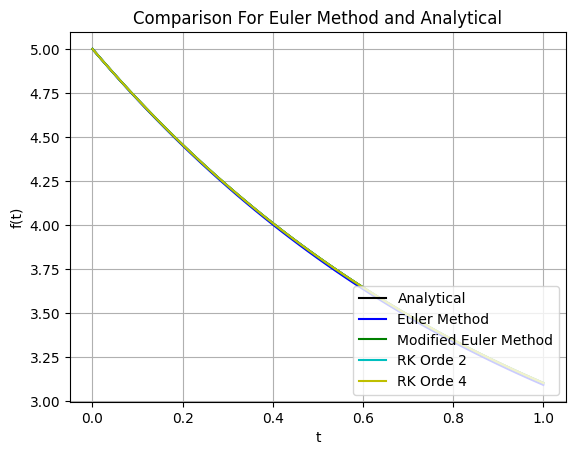

In [ ]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
plt.title('Comparison For Euler Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

In [ ]:
lst=[e_euler,e_modified_euler,e_rko2,e_rko4]
name_lst=['Euler', 'modified euler', 'Runge Kutta Orde 2','Runge Kutta Orde 4']
delta_time_lst=[delta_time_euler, delta_time_modified_euler, delta_time_rko2,delta_time_rko4]
delta_time_lst=[i.microseconds for i in delta_time_lst]
for i, lst_i in enumerate(lst):
  mean=np.mean(lst_i)
  median=np.median(lst_i)
  max=np.max(lst_i)
  print('{} method have \nmean: {}\nmedian: {}\nmax: {}\ntime to execute: {}\n'.format(name_lst[i], mean, median, max, delta_time_lst[i]))

Euler method have 
mean: 0.21932176094485345
median: 0.2408055585896808
max: 0.3585882790741312
time to execute: 1454

modified euler method have 
mean: 0.0007386475153967634
median: 0.0006399456393990004
max: 0.0016809603305274284
time to execute: 1092

Runge Kutta Orde 2 method have 
mean: 0.0014692246415655443
median: 0.001611983198840056
max: 0.00240655881607969
time to execute: 499

Runge Kutta Orde 4 method have 
mean: 2.9432788873601497e-08
median: 3.229280368697513e-08
max: 4.8209698416806334e-08
time to execute: 752



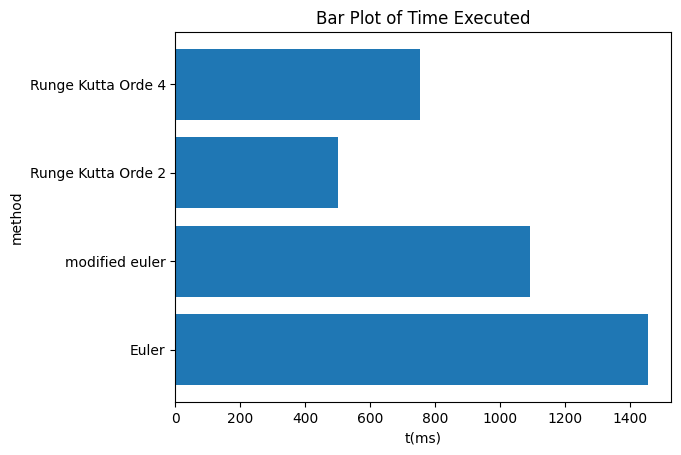

In [ ]:
plt.barh(name_lst, delta_time_lst)

plt.title('Bar Plot of Time Executed')
plt.xlabel('t(ms)')
plt.ylabel('method')
# plt.grid()
# plt.legend(loc='lower right')
plt.show()

## Nomor 8
Analysis :
1. Persamaan analitik yang ditemukan adalah heavyside function yang merupakan persamaan tidak stabil
2. Persamaan ini menghasilkan prediksi nilai yang sama setiap metode
Improvement:
1. Modified Euler ?

### bagian a

In [ ]:
def rk_o2_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f1=lambda t, y1,y2 : 1-y1+y2
  f2=lambda t, y1, y2 : 1+y1-y2
  f1_t=lambda t: np.heaviside(t, 0)
  f2_t=lambda t: np.heaviside(t, 0)
  t_0=0
  t_end=1
  dt=0.02
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  y1 = np.zeros(len(t))
  y2 = np.zeros(len(t))
  k11 = np.zeros(len(t))
  k21 = np.zeros(len(t))
  k12 = np.zeros(len(t))
  k22 = np.zeros(len(t))
  y1_t=np.zeros(len(t))
  y2_t=np.zeros(len(t))
  e1=np.zeros(len(t))
  e2=np.zeros(len(t))

  for j in range(len(t)-1):
      #calculate y_pred
      k11[j+1]=f1(t[j],y1[j], y2[j])#calculate k11
      k21[j+1]=f2(t[j],y1[j], y2[j])#calculate k11
      k12[j+1]=f1(t[j+1], y1[j]+k11[j+1]*dt, y2[j]+k21[j+1]*dt)#calculate k12
      k22[j+1]=f2(t[j+1], y1[j]+k11[j+1]*dt, y2[j]+k21[j+1]*dt)#calculate k22
      y1[j+1]=y1[j]+(k11[j+1]+k12[j+1])*dt/2#calculate y_pred 1
      y2[j+1]=y2[j]+(k21[j+1]+k22[j+1])*dt/2#calculate y_pred 2
      y1_t[j+1]=f1_t(t[j+1])
      y2_t[j+1]=f2_t(t[j+1])
      e1[j+1]=round((np.abs(y1[j+1]-y1_t[j+1])/y1_t[j+1])*100, 2)
      e2[j+1]=round((np.abs(y2[j+1]-y2_t[j+1])/y2_t[j+1])*100,2)

  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)

  if pr==1:
    return t, y1_t,y2_t, y1,y2, e1, e2, delta_time

  else:
    df = pd.DataFrame(list(zip(t,y1_t,y1,e1,y2_t,y2,e2,k11,k21,k12,k22)),
                  columns =['t','y1_t','y1','e1(%)','y2_t','y2','e2(%)','k11','k21','k12','k22'])
    display(df)
    plt.plot(t, y1_t,color='k', label='Analytical')
    plt.plot(t, y1, color='0.7', label='y1-Runge Kutta O2')
    plt.plot(t, y2, color='0.7',linestyle='--', label='y2-Runge Kutta O2')
    plt.title('Analytical vs RKO2 (Simultaneusly-First-Order)')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()



,t,y1_t,y1,e1(%),y2_t,y2,e2(%),k11,k21,k12,k22
0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.02,1.0,0.02,98.0,1.0,0.02,98.0,1.0,1.0,1.0,1.0
2,0.04,1.0,0.04,96.0,1.0,0.04,96.0,1.0,1.0,1.0,1.0
3,0.06,1.0,0.06,94.0,1.0,0.06,94.0,1.0,1.0,1.0,1.0
4,0.08,1.0,0.08,92.0,1.0,0.08,92.0,1.0,1.0,1.0,1.0
5,0.10,1.0,0.10,90.0,1.0,0.10,90.0,1.0,1.0,1.0,1.0
6,0.12,1.0,0.12,88.0,1.0,0.12,88.0,1.0,1.0,1.0,1.0
7,0.14,1.0,0.14,86.0,1.0,0.14,86.0,1.0,1.0,1.0,1.0
8,0.16,1.0,0.16,84.0,1.0,0.16,84.0,1.0,1.0,1.0,1.0
9,0.18,1.0,0.18,82.0,1.0,0.18,82.0,1.0,1.0,1.0,1.0


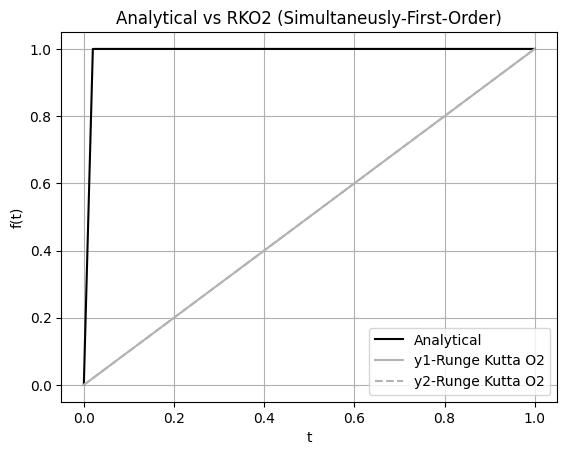

In [ ]:
rk_o2_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=2)

### Bagian B

In [ ]:
def rk_o4_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  dt=0.02 #delta time
  f1=lambda t, y1,y2 : 1-y1+y2
  f2=lambda t, y1, y2 : 1+y1-y2
  f1_t=lambda t: np.heaviside(t, 0)
  f2_t=lambda t: np.heaviside(t, 0)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  #defined variable with zeros matrix

  y1=np.zeros(len(t))
  y2=np.zeros(len(t))
  k11=np.zeros(len(t))
  k21=np.zeros(len(t))
  k12=np.zeros(len(t))
  k22=np.zeros(len(t))
  k13=np.zeros(len(t))
  k23=np.zeros(len(t))
  k14=np.zeros(len(t))
  k24=np.zeros(len(t))
  y1_t=np.zeros(len(t))
  y2_t=np.zeros(len(t))
  e1=np.zeros(len(t))
  e2=np.zeros(len(t))

  #looping
  for j in range(len(t)-1):
      #calculate y_pred
      k11[j+1]=f1(t[j],y1[j], y2[j])#calculate k11
      k21[j+1]=f2(t[j],y1[j], y2[j])#calculate k21
      k12[j+1]=f1(t[j]+dt/2, y1[j]+k11[j+1]*dt/2, y2[j]+k21[j+1]*dt/2)#calculate k21
      k22[j+1]=f2(t[j]+dt/2, y1[j]+k11[j+1]*dt/2, y2[j]+k21[j+1]*dt/2)#calculate k22
      k13[j+1]=f1(t[j]+dt/2, y1[j]+k12[j+1]*dt/2, y2[j]+k22[j+1]*dt/2)#calculate k31
      k23[j+1]=f2(t[j]+dt/2, y1[j]+k12[j+1]*dt/2, y2[j]+k22[j+1]*dt/2)#calculate k32
      k14[j+1]=f1(t[j]+dt, y1[j]+k13[j+1]*dt, y2[j]+k23[j+1]*dt)#calculate k41
      k24[j+1]=f2(t[j]+dt, y1[j]+k13[j+1]*dt, y2[j]+k23[j+1]*dt)#calculate k42
      y1[j+1]=y1[j]+(k11[j+1]+2*k12[j+1]+2*k13[j+1]+k14[j+1])*dt/6
      y2[j+1]=y2[j]+(k21[j+1]+2*k22[j+1]+2*k23[j+1]+k24[j+1])*dt/6
      y1_t[j+1]=f1_t(t[j+1])
      y2_t[j+1]=f2_t(t[j+1])
      e1[j+1]=round((np.abs(y1[j+1]-y1_t[j+1])/y1_t[j+1])*100, 2)
      e2[j+1]=round((np.abs(y2[j+1]-y2_t[j+1])/y2_t[j+1])*100,2)

  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)

  if pr==1:
    return t, y1_t,y2_t, y1,y2, e1, e2, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y1_t,y1,e1,y2_t,y2,e2, k11,k12,k13,k14,k21,k22,k23,k24)),
                columns =['t','y1_t','y1','e1(%)','y2_t','y2','e2(%)','k11','k12','k13','k14','k21','k22','k23','k24'])
    display(df)
    plt.plot(t, y1_t,color='k', label='Analytical')
    plt.plot(t, y1, color='0.7', label='y1-Runge Kutta O4')
    plt.plot(t, y2, color='0.7',linestyle='--', label='y2-Runge Kutta O4')
    plt.title('Analytical vs RKO4 (Simultaneusly-First-Order)')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()


,t,y1_t,y1,e1,y2_t,y2,e2,k11,k12,k13,k14,k21,k22,k23,k24
0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02,1.0,0.02,98.0,1.0,0.02,98.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.04,1.0,0.04,96.0,1.0,0.04,96.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.06,1.0,0.06,94.0,1.0,0.06,94.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.08,1.0,0.08,92.0,1.0,0.08,92.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.10,1.0,0.10,90.0,1.0,0.10,90.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.12,1.0,0.12,88.0,1.0,0.12,88.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.14,1.0,0.14,86.0,1.0,0.14,86.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,0.16,1.0,0.16,84.0,1.0,0.16,84.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0.18,1.0,0.18,82.0,1.0,0.18,82.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


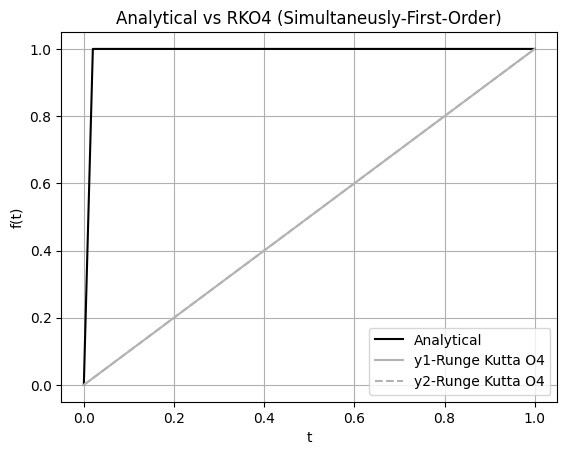

In [ ]:
rk_o4_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=2)

### Bagian C


#### Additional Function

In [ ]:
def euler_simultaneusly_differential_equations_single_order_1(dt=0.1, pr=2):
  start_time = time.monotonic()
  f1=lambda t, y1,y2 : 1-y1+y2
  f2=lambda t, y1, y2 : 1+y1-y2
  f_t=lambda t: np.heaviside(t, 0)
  t_0=0
  t_end=1
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  y1 = np.zeros(len(t))
  y2 = np.zeros(len(t))
  y_t= np.zeros(len(t))
  e1 = np.zeros(len(t))
  e2 = np.zeros(len(t))
  y1[0]=0
  y2[0]= 0
  y_t[0]=0
  #looping
  for j in range(len(t)-1):
    y1[j+1]=y1[j]+f1(t[j],y1[j], y2[j])*dt
    y2[j+1]=y2[j]+f2(t[j],y1[j], y2[j])*dt
    y_t[j+1]=f_t(t[j+1])
    e1[j+1]=round((np.abs(y1[j+1]-y_t[j+1])/y_t[j+1])*100, 2)
    e2[j+1]=round((np.abs(y2[j+1]-y_t[j+1])/y_t[j+1])*100,2)
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y1, e1, y2, e2, delta_time
  else:
    df = pd.DataFrame(list(zip(t,y_t, y1, e1, y2, e2)),
                      columns =['t','y_true','y1', 'e1(%)', 'y2', 'e2(%)'])
    display(df)

    plt.plot(t, y_t,color='k', label='y true')
    plt.plot(t, y1, color='0.7', label='y1')
    plt.plot(t, y2, color='0.7',linestyle='--', label='y2')
    plt.title('Graph to see y1 and y2')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

In [ ]:
def euler_modified_simultaneusly_differential_equations_single_order_1(dt=0.1, pr=2,eps=1.0):
  start_time = time.monotonic()
  f1=lambda t, y1,y2 : 1-y1+y2
  f2=lambda t, y1, y2 : 1+y1-y2
  f_t=lambda t: np.heaviside(t, 0)
  t_0=0
  t_end=1
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  y1 = np.zeros(len(t))
  y2 = np.zeros(len(t))
  yp1= np.zeros(len(t))
  yp2= np.zeros(len(t))
  dif1= np.zeros(len(t))
  dif2= np.zeros(len(t))
  ep1= np.zeros(len(t))
  ep2= np.zeros(len(t))
  y_t= np.zeros(len(t))
  e1 = np.zeros(len(t))
  e2 = np.zeros(len(t))
  k1 = np.zeros(len(t))
  k2 = np.zeros(len(t))
  y1[0]=0
  y2[0]= 0
  y_t[0]=0
  #looping
  for j in range(len(t)-1):
    #Calculate y_t
    y_t[j+1]=f_t(t[j+1])
    #calculate yp
    yp1[j+1]=y1[j]+f1(t[j],y1[j], y2[j])*dt
    yp2[j+1]=y1[j]+f2(t[j],y1[j], y2[j])*dt
    #calculate yk
    yk1 = [y1[j]+(f1(t[j],y1[j],y2[j])+f1(t[j+1],yp1[j+1],yp2[j+1]))*dt*0.5]
    yk2 = [y2[j]+(f2(t[j],y1[j],y2[j])+f2(t[j+1],yp1[j+1],yp2[j+1]))*dt*0.5]
    # calculate error
    e1[j+1]=round((np.abs(yk1[-1]-y_t[j+1])/y_t[j+1])*100, 2)
    e2[j+1]=round((np.abs(yk2[-1]-y_t[j+1])/y_t[j+1])*100,2)
    # calculate dif
    dif1[j+1]=np.abs(yk1[-1]-yp1[j+1])
    dif2[j+1]=np.abs(yk2[-1]-yp2[j+1])
    while dif1[j+1]>eps and dif2[j+1]>eps:
          yk1.append(y1[j]+(f1(t[j],y1[j],y2[j])+f1(t[j+1],yk1[-1],yk2[-1]))*dt*0.5)
          yk2.append(y2[j]+(f2(t[j],y1[j],y2[j])+f2(t[j+1],yk1[-1],yk2[-1]))*dt*0.5)
          dif1[j+1]=np.abs(yk1[-1]-yk1[-2])
          dif2[j+1]=np.abs(yk2[-1]-yk2[-2])
          e1[j+1]=round((np.abs(yk1[-1]-y_t[j+1])/y_t[j+1])*100, 2)
          e2[j+1]=round((np.abs(yk2[-1]-y_t[j+1])/y_t[j+1])*100,2)

    k1[j+1]=len(yk1)
    k2[j+1]=len(yk2)
    y1[j+1]=yk1[-1]
    y2[j+1]=yk2[-1]
    ep1[j+1]=round((np.abs(yp1[-1]-y_t[j+1])/y_t[j+1])*100,2)
    ep2[j+1]=round((np.abs(yp1[-1]-y_t[j+1])/y_t[j+1])*100,2)


  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t,y_t,yp1,y1,dif1, e1,ep1,k1, yp2,y2,dif2, e2,ep2,k2,delta_time
  else:
    df = pd.DataFrame(list(zip(t,y_t,yp1,y1,dif1, e1,ep1,k1, yp2,y2,dif2, e2,ep2,k2)),
                      columns =['t','y_true','yp1','y1','dif1','e1(%)','ep1(%)','k1','yp2','y2','dif2','e2(%)','ep2(%)','k2'])
    display(df)

    plt.plot(t, y_t,color='k', label='y true')
    plt.plot(t, y1, color='0.7', label='y1')
    plt.plot(t, y2, color='0.7',linestyle='--', label='y2')
    plt.title('Graph to see y1 and y2')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y_true,yp1,y1,dif1,e1(%),ep1(%),k1,yp2,y2,dif2,e2(%),ep2(%),k2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,1.0,0.1,0.1,0.0,90.0,90.0,1.0,0.1,0.1,0.0,90.0,90.0,1.0
2,0.2,1.0,0.2,0.2,0.0,80.0,80.0,1.0,0.2,0.2,0.0,80.0,80.0,1.0
3,0.3,1.0,0.3,0.3,0.0,70.0,70.0,1.0,0.3,0.3,0.0,70.0,70.0,1.0
4,0.4,1.0,0.4,0.4,0.0,60.0,60.0,1.0,0.4,0.4,0.0,60.0,60.0,1.0
5,0.5,1.0,0.5,0.5,0.0,50.0,50.0,1.0,0.5,0.5,0.0,50.0,50.0,1.0
6,0.6,1.0,0.6,0.6,0.0,40.0,40.0,1.0,0.6,0.6,0.0,40.0,40.0,1.0
7,0.7,1.0,0.7,0.7,0.0,30.0,30.0,1.0,0.7,0.7,0.0,30.0,30.0,1.0
8,0.8,1.0,0.8,0.8,0.0,20.0,20.0,1.0,0.8,0.8,0.0,20.0,20.0,1.0
9,0.9,1.0,0.9,0.9,0.0,10.0,10.0,1.0,0.9,0.9,0.0,10.0,10.0,1.0


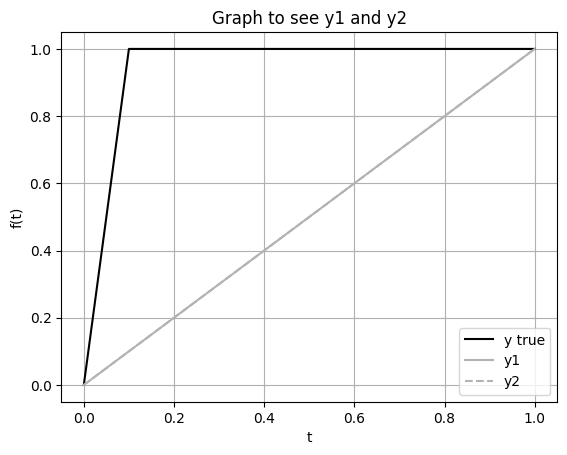

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.000865


In [ ]:
euler_modified_simultaneusly_differential_equations_single_order_1(dt=0.1, pr=2,eps=1.0)

#### Perbandingan

In [ ]:
t, y_t, y1_eo1s, e1_eo1s, y2_eo1s, e2_eo1s, delta_time_eo1s=euler_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=1)
_, _,_, y1_rko2_o1s,y2_rko2_o1s, e1_rko2_o1s, e2_rko2_o1s, delta_time_rko2_o1s=rk_o2_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=1)
_, _,_, y1_rko4_o1s,y2_rko4_o1s, e1_rko4_o1s, e2_rko4_o1s, delta_time_rko4_o1s=rk_o4_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=1)
_,_,_,y1_em,_,e1_em,_,_,_,y2_em,_, e2_em,_,_,delta_time_em=euler_modified_simultaneusly_differential_equations_single_order_1(dt=0.02, pr=1,eps=1.0)

In [ ]:
df = pd.DataFrame(list(zip(t, y1_eo1s, e1_eo1s, y2_eo1s, e2_eo1s,\
                           y1_rko2_o1s, e1_rko2_o1s, y2_rko2_o1s, e2_rko2_o1s, \
                           y1_rko4_o1s,e1_rko4_o1s,y2_rko4_o1s,e2_rko4_o1s,\
                           y1_em, e1_em, y2_em, e2_em)),
              columns =['t','y1_eo1s', 'e1_eo1s', 'y2_eo1s','e2_eo1s',\
                        'y1_rko2_o1s','e1_rko2_o1s(%)','y2_rko2_o1s', 'e2_rko2_o1s(%)',\
                        'y1_rko4_o1s','e1_rko4_o1s(%)','y2_rko4_o1s', 'e2_rko4_o1s(%)',\
                        'y1_em', 'e1_em(%)', 'y2_em', 'e2_em(%)'])

In [ ]:
display(df)

,t,y1_eo1s,e1_eo1s,y2_eo1s,e2_eo1s,y1_rko2_o1s,e1_rko2_o1s(%),y2_rko2_o1s,e2_rko2_o1s(%),y1_rko4_o1s,e1_rko4_o1s(%),y2_rko4_o1s,e2_rko4_o1s(%)
0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
1,0.02,0.02,98.0,0.02,98.0,0.02,98.0,0.02,98.0,0.02,98.0,0.02,98.0
2,0.04,0.04,96.0,0.04,96.0,0.04,96.0,0.04,96.0,0.04,96.0,0.04,96.0
3,0.06,0.06,94.0,0.06,94.0,0.06,94.0,0.06,94.0,0.06,94.0,0.06,94.0
4,0.08,0.08,92.0,0.08,92.0,0.08,92.0,0.08,92.0,0.08,92.0,0.08,92.0
5,0.10,0.10,90.0,0.10,90.0,0.10,90.0,0.10,90.0,0.10,90.0,0.10,90.0
6,0.12,0.12,88.0,0.12,88.0,0.12,88.0,0.12,88.0,0.12,88.0,0.12,88.0
7,0.14,0.14,86.0,0.14,86.0,0.14,86.0,0.14,86.0,0.14,86.0,0.14,86.0
8,0.16,0.16,84.0,0.16,84.0,0.16,84.0,0.16,84.0,0.16,84.0,0.16,84.0
9,0.18,0.18,82.0,0.18,82.0,0.18,82.0,0.18,82.0,0.18,82.0,0.18,82.0


In [ ]:
np.all(((y1_eo1s==y2_eo1s)==(y1_rko2_o1s==y2_rko2_o1s))==((y1_rko4_o1s==y2_rko4_o1s)==(y1_em==y2_em)))

True

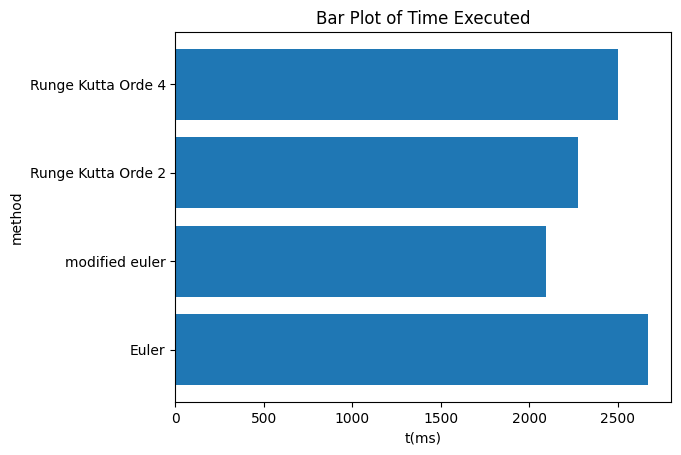

In [ ]:
name_lst=['Euler', 'modified euler', 'Runge Kutta Orde 2','Runge Kutta Orde 4']
delta_time_lst=[delta_time_eo1s, delta_time_em, delta_time_rko2_o1s,delta_time_rko4_o1s]
delta_time_lst=[i.microseconds for i in delta_time_lst]
plt.barh(name_lst, delta_time_lst)

plt.title('Bar Plot of Time Executed')
plt.xlabel('t(ms)')
plt.ylabel('method')
# plt.grid()
# plt.legend(loc='lower right')
plt.show()


## Nomor 9
analysis:
modified euler tidak bekerja


### Bagian A

In [ ]:
def rko2_single_high_order_ordinary_differential_equations(dt=0.02, pr=1):
  start_time = time.monotonic()
  f=lambda t,y,a : 4-2*y-3*a
  f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
  t_0=0
  t_end=1
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  ka2=np.zeros(len(t))
  ky2=np.zeros(len(t))
  ka1=np.zeros(len(t))
  ky1=np.zeros(len(t))
  y_t=np.zeros(len(t))
  a=np.zeros(len(t))
  e=np.zeros(len(t))
  y = np.zeros(len(t))

  #looping
  for j in range(len(t)-1):
    ky1[j+1]=a[j]
    ka1[j+1]=f(t[j], y[j], a[j])
    ky2[j+1]=a[j]+ky1[j+1]*dt
    ka2[j+1]=f(t[j+1], y[j]+ky1[j+1]*dt, a[j]+ka1[j+1]*dt)
    y[j+1]=y[j]+(ky1[j+1]+ ky2[j+1])*dt*0.5
    a[j+1]=a[j]+(ka1[j+1]+ ka2[j+1])*dt*0.5
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e, a, ka2,ky2,ka1, ky1,delta_time
  else:
    df = pd.DataFrame(list(zip(t, y_t, y, e, a, ka2,ky2,ka1, ky1)),
                columns =['t','y_t','y','e', 'a', 'ka2','ky2','ka1','ky1'])
    display(df)
    plt.plot(t, y_t,color='k', label='Analytical')
    plt.plot(t, y, color='0.7', label='Runge Kutta O2')
    plt.title('Analytical vs RKO2 (Single-High-Order)')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y_t,y,e,a,ka2,ky2,ka1,ky1
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000784,0.000000,100.000000,0.077600,3.760000,0.000000,4.000000,0.000000
2,0.04,0.003075,0.001568,49.022682,0.150653,3.538064,0.079152,3.767200,0.077600
3,0.06,0.006783,0.004611,32.022989,0.219364,3.326187,0.153666,3.544907,0.150653
4,0.08,0.011822,0.009042,23.518014,0.283930,3.123952,0.223751,3.332688,0.219364
5,0.10,0.018112,0.014777,18.411172,0.344541,2.930962,0.289609,3.130126,0.283930
6,0.12,0.025574,0.021737,15.003600,0.401377,2.746832,0.351432,2.936823,0.344541
7,0.14,0.034135,0.029845,12.567210,0.454613,2.571195,0.409405,2.752394,0.401377
8,0.16,0.043723,0.039028,10.737956,0.504415,2.403698,0.463706,2.576471,0.454613
9,0.18,0.054272,0.049217,9.313590,0.550942,2.244001,0.514503,2.408699,0.504415


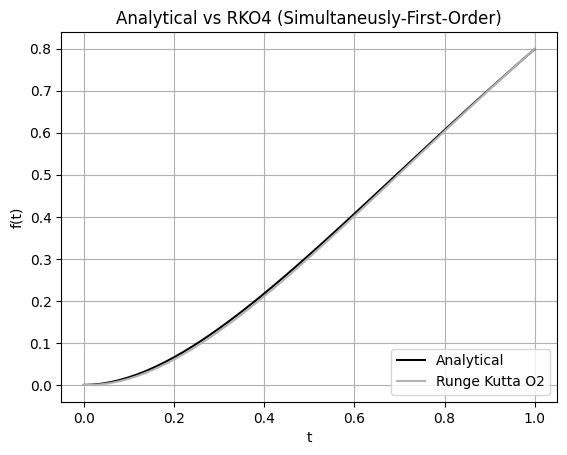

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001034


In [ ]:
rko2_single_high_order_ordinary_differential_equations(dt=0.02, pr=2)

### Bagian B

In [ ]:
def rko4_single_high_order_ordinary_differential_equations(dt=0.02, pr=1):
  start_time = time.monotonic()
  f=lambda t,y,a : 4-2*y-3*a
  f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  ka4=np.zeros(len(t))
  ky4=np.zeros(len(t))
  ka3=np.zeros(len(t))
  ky3=np.zeros(len(t))
  ka2=np.zeros(len(t))
  ky2=np.zeros(len(t))
  ka1=np.zeros(len(t))
  ky1=np.zeros(len(t))
  a=np.zeros(len(t))
  y = np.zeros(len(t))
  y_t = np.zeros(len(t))
  e = np.zeros(len(t))

  #looping
  for j in range(len(t)-1):
    ky1[j+1]=a[j]
    ka1[j+1]=f(t[j], y[j], a[j])
    ky2[j+1]=a[j]+ky1[j+1]*dt/2
    ka2[j+1]=f(t[j]+dt/2, y[j]+ky1[j+1]*dt/2, a[j]+ka1[j+1]*dt/2)
    ky3[j+1]=a[j]+ky2[j+1]*dt/2
    ka3[j+1]=f(t[j]+dt/2, y[j]+ky2[j+1]*dt/2, a[j]+ka2[j+1]*dt/2)
    ky4[j+1]=a[j]+ky3[j+1]*dt
    ka4[j+1]=f(t[j]+dt, y[j]+ky3[j+1]*dt, a[j]+ka3[j+1]*dt)
    y[j+1]=y[j]+(ky1[j+1]+ 2*ky2[j+1]+2*ky3[j+1]+ky4[j+1])*dt/6
    a[j+1]=a[j]+(ka1[j+1]+ 2*ka2[j+1]+2*ka3[j+1]+ka4[j+1])*dt/6
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t,y,e, a,ka4,ky4,ka3, ky3, ka2,ky2,ka1, ky1,delta_time
  else:
    df = pd.DataFrame(list(zip(t, y_t,y,e, a,ka4,ky4,ka3, ky3, ka2,ky2,ka1, ky1)),
                  columns =['t','y_t','y','e', 'a','ka4','ky4','ka3','ky3', 'ka2', 'ky2', 'ka1', 'ky1'])
    display(df)
    plt.plot(t, y_t,color='k', label='Analytical')
    plt.plot(t, y, color='0.7', label='Runge Kutta O4')
    plt.title('Analytical vs RKO2 (Single-High-Order)')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y_t,y,e,a,ka4,ky4,ka3,ky3,ka2,ky2,ka1,ky1
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000784,0.000000,100.000000,0.077647,3.766984,0.000000,3.883600,0.000000,3.880000,0.000000,4.000000,0.000000
2,0.04,0.003075,0.001569,48.988238,0.150742,3.544566,0.079216,3.655915,0.078432,3.652493,0.078424,3.767058,0.077647
3,0.06,0.006783,0.004614,31.977758,0.219490,3.332234,0.153787,3.438533,0.152265,3.435283,0.152250,3.544637,0.150742
4,0.08,0.011822,0.009048,23.467902,0.284090,3.129571,0.223925,3.231029,0.221707,3.227942,0.221685,3.332301,0.219490
5,0.10,0.018112,0.014787,18.358535,0.344730,2.936177,0.289829,3.032994,0.286959,3.030064,0.286931,3.129635,0.284090
6,0.12,0.025574,0.021751,14.949609,0.401591,2.751667,0.351694,2.844037,0.348211,2.841256,0.348177,2.936238,0.344730
7,0.14,0.034135,0.029863,12.512530,0.454849,2.575672,0.409704,2.663778,0.405647,2.661141,0.405607,2.751725,0.401591
8,0.16,0.043723,0.039052,10.683000,0.504669,2.407838,0.464038,2.491858,0.459443,2.489358,0.459397,2.575727,0.454849
9,0.18,0.054272,0.049247,9.258628,0.551211,2.247824,0.514864,2.327929,0.509766,2.325560,0.509715,2.407890,0.504669


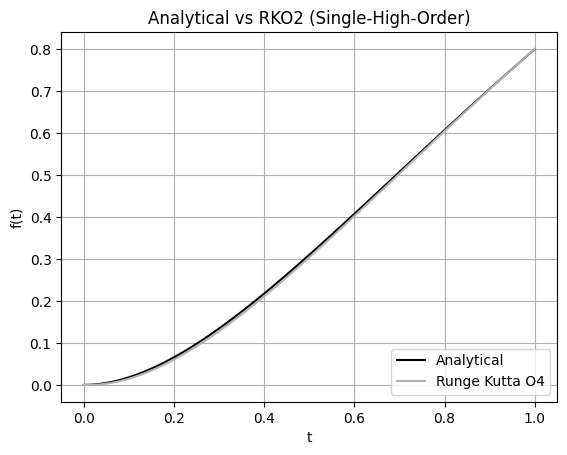

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.006931


In [ ]:
rko4_single_high_order_ordinary_differential_equations(dt=0.02, pr=2)

### Bagian C

#### Euler

In [ ]:
def euler_single_high_order_ordinary_differential_equations(dt = 0.02, pr=1):
  start_time = time.monotonic()
  f=lambda y,a : 4-2*y-3*a
  f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
  t_0=0
  t_end=1
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  y = np.zeros(len(t))
  a = np.zeros(len(t))
  y_t = np.zeros(len(t))
  e=np.zeros(len(t))

  #looping
  for j in range(len(t)-1):
    y[j+1]=y[j]+a[j]*dt
    a[j+1]=a[j]+f(y[j],a[j])*dt
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=round((np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100,2)
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e, a,delta_time
  else:
    df = pd.DataFrame(list(zip(t, y_t, y, e, a)),
                columns =['t','y_t','y','e', 'a'])
    display(df)
    plt.plot(t, y, '0.7', label='Euler Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

#### Modified Euler

In [ ]:
#defined variable
def modified_euler_single_high_order_ordinary_differential_equations(dt = 0.1, pr=1, eps=1.0):
  start_time = time.monotonic()
  f=lambda t,y,a : 4-2*y-3*a
  f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  y = np.zeros(len(t))
  yp =np.zeros(len(t))
  a = np.zeros(len(t))
  ak = np.zeros(len(t))
  ap = np.zeros(len(t))
  y_t = np.zeros(len(t))
  k = np.zeros(len(t))
  e=np.zeros(len(t))
  ep=np.zeros(len(t))
  dif=np.zeros(len(t))

  #looping
  for j in range(len(t)-1):
    #Calculate y_t
    y_t[j+1]=f_t(t[j+1])
    #calculate yp
    yp[j+1]=y[j]+a[j]*dt
    #calculate ap
    ap[j+1]=a[j]+f(t[j],y[j],a[j])*dt
    #calculate error_p
    ep[j+1]=round((np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100, 2)
    #calculate yk
    yk = [yp[j+1]+ap[j+1]*dt]
    #calculate ak
    ak = [a[j]+(f(t[j],y[j],a[j])+f(t[j+1],yp[j+1],ap[j+1]))*dt*0.5]
    # calculate dif
    dif[j+1]=np.abs(yk[-1]-yp[j+1])
    while dif[j+1]>eps:
          yk.append(yk[-1]+ak[-1]*dt)
          ak.append(a[j]+(f(t[j],y[j],a[j])+f(t[j+1],yk[-1],ak[-1]))*dt*0.5)
          dif[j+1]=np.abs(yk[-1]-yk[-2])
    y[j+1]=yk[-1]
    a[j+1]=ak[-1]
    k[j+1]=len(yk)
    e[j+1]=round((np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100, 2)
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t,y_t,yp,y,ap,a,dif, e,ep,k,delta_time
  else:
    df = pd.DataFrame(list(zip(t,y_t,yp,y,ap,a,dif, e,ep,k)),
                    columns =['t','y_true','yp','y','ap','ak','dif','e(%)','ep(%)','k'])
    display(df)
    plt.plot(t, y, '0.7', label='Modified Euler Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For Modified Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))



,t,y_true,yp,y,ap,ak,dif,e(%),ep(%),k
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0
1,0.1,0.018112,0.000000,0.040000,0.400000,0.340000,0.040000,120.85,100.00,1.0
2,0.2,0.065717,0.074000,0.137000,0.630000,0.583100,0.063000,108.47,12.60,1.0
3,0.3,0.134350,0.195310,0.273387,0.780770,0.745289,0.078077,103.49,45.37,1.0
4,0.4,0.217378,0.347916,0.434618,0.867025,0.841311,0.086702,99.94,60.05,1.0
5,0.5,0.309636,0.518749,0.608949,0.901994,0.884479,0.090199,96.67,67.54,1.0
6,0.6,0.407142,0.697397,0.787131,0.897345,0.886571,0.089735,93.33,71.29,1.0
7,0.7,0.506853,0.875788,0.962106,0.863173,0.857817,0.086317,89.82,72.79,1.0
8,0.8,0.606477,1.047887,1.128692,0.808051,0.806938,0.080805,86.11,72.78,1.0
9,0.9,0.704319,1.209386,1.283298,0.739118,0.741221,0.073912,82.20,71.71,1.0


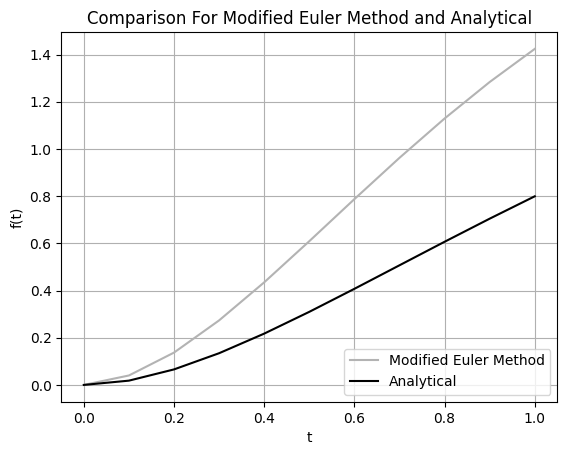

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.004624


In [ ]:
modified_euler_single_high_order_ordinary_differential_equations(dt = 0.1, pr=2, eps=1.0)

### Perbandingan

In [ ]:
t, y_t, y_rko2, e_rko2,_,_,_,_,_,delta_time_rko2=rko2_single_high_order_ordinary_differential_equations(dt=0.02, pr=1)
_,_,y_rko4,e_rko4,_,_,_,_,_,_,_,_,_,delta_time_rko4=rko4_single_high_order_ordinary_differential_equations(dt=0.02, pr=1)
_,_,y_euler,e_euler, _,delta_time_euler=euler_single_high_order_ordinary_differential_equations(dt = 0.02, pr=1)
_,_,_,y_me,_,_,_,e_me,_,_,delta_time_me=modified_euler_single_high_order_ordinary_differential_equations(dt = 0.02, pr=1, eps=1.0)

In [ ]:
df = pd.DataFrame(list(zip(t, y_t, y_euler,y_me,y_rko2, y_rko4,\
                               e_euler,e_me,e_rko2,e_rko4)),
                  columns =['t','y true', 'y euler','y modified euler','y rko2','y rko4'\
                              ,'e euler','e modified euler','e rko2','e rko4'])

In [ ]:
display(df)

,t,y true,y euler,y modified euler,y rko2,y rko4,e euler,e modified euler,e rko2,e rko4
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000
1,0.02,0.000784,0.000000,0.001600,0.000000,0.000000,100.00,104.03,100.000000,100.000000
2,0.04,0.003075,0.001600,0.006210,0.001568,0.001569,47.97,101.94,49.022682,48.988238
3,0.06,0.006783,0.004704,0.013648,0.004611,0.004614,30.65,101.21,32.022989,31.977758
4,0.08,0.011822,0.009220,0.023739,0.009042,0.009048,22.01,100.80,23.518014,23.467902
5,0.10,0.018112,0.015062,0.036314,0.014777,0.014787,16.84,100.50,18.411172,18.358535
6,0.12,0.025574,0.022146,0.051210,0.021737,0.021751,13.40,100.24,15.003600,14.949609
7,0.14,0.034135,0.030393,0.068269,0.029845,0.029863,10.96,100.00,12.567210,12.512530
8,0.16,0.043723,0.039727,0.087341,0.039028,0.039052,9.14,99.76,10.737956,10.683000
9,0.18,0.054272,0.050077,0.108278,0.049217,0.049247,7.73,99.51,9.313590,9.258628


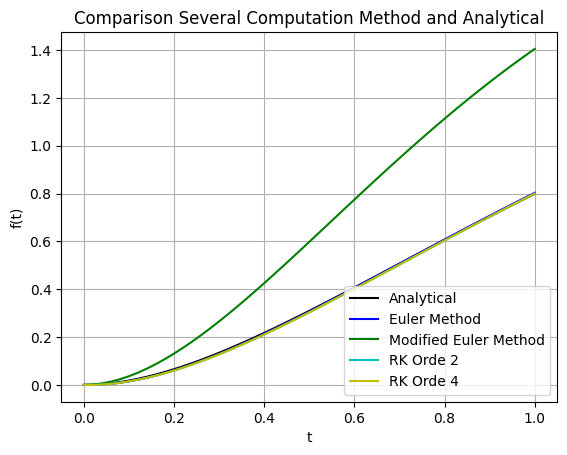

In [ ]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_me, 'g', label='Modified Euler Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
plt.title('Comparison Several Computation Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


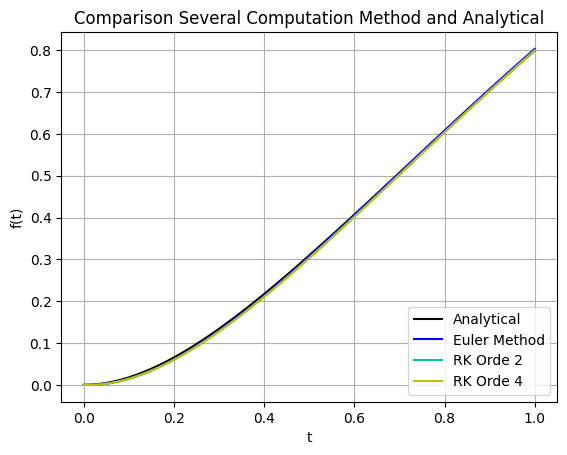

In [ ]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
plt.title('Comparison Several Computation Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

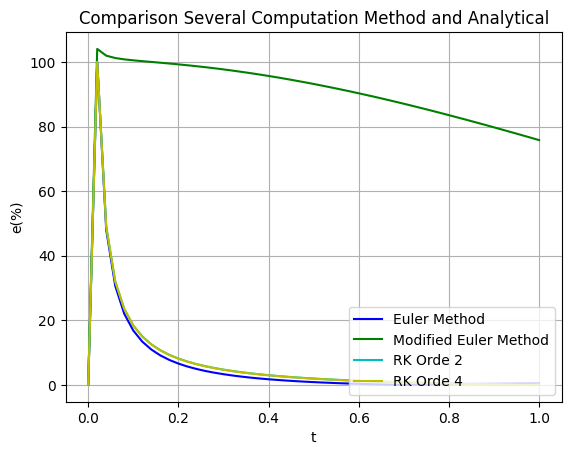

In [ ]:
plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_me, 'g', label='Modified Euler Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
plt.title('Comparison Several Computation Method and Analytical')
plt.xlabel('t')
plt.ylabel('e(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

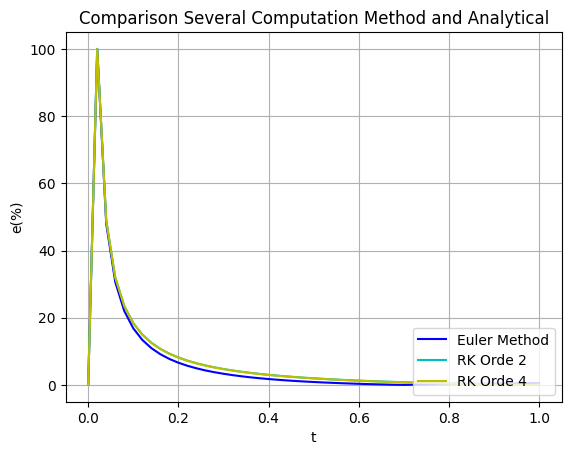

In [ ]:
plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
plt.title('Comparison Several Computation Method and Analytical')
plt.xlabel('t')
plt.ylabel('e(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
lst=[e_euler,e_me,e_rko2,e_rko4]
name_lst=['Euler','modified euler','Runge Kutta Orde 2','Runge Kutta Orde 4']
delta_time_lst=[delta_time_euler,delta_time_me,delta_time_rko2,delta_time_rko4]
delta_time_lst=[i.microseconds for i in delta_time_lst]
for i, lst_i in enumerate(lst):
  mean=np.mean(lst_i)
  median=np.median(lst_i)
  max=np.max(lst_i)
  print('{} method have \nmean: {}\nmedian: {}\nmax: {}\ntime to execute: {}\n'.format(name_lst[i], mean, median, max, delta_time_lst[i]))



Euler method have 
mean: 6.132941176470589
median: 0.74
max: 100.0
time to execute: 726

modified euler method have 
mean: 89.60666666666665
median: 92.63
max: 104.03
time to execute: 1615

Runge Kutta Orde 2 method have 
mean: 6.966593228251209
median: 1.8178298099398786
max: 100.0
time to execute: 1005

Runge Kutta Orde 4 method have 
mean: 6.926933334431626
median: 1.7727373124716812
max: 100.0
time to execute: 971



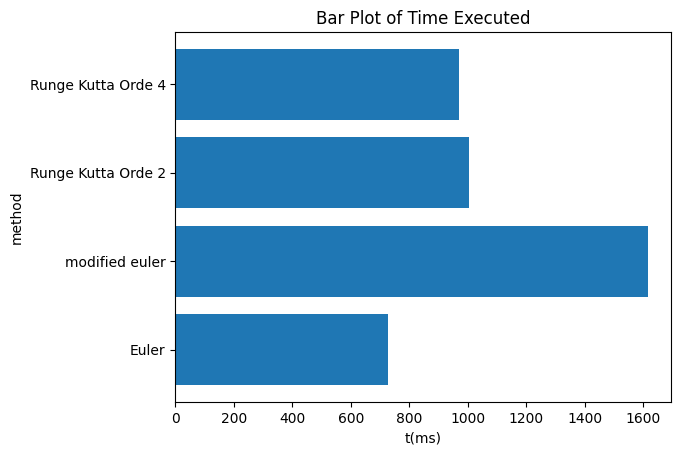

In [ ]:
plt.barh(name_lst, delta_time_lst)

plt.title('Bar Plot of Time Executed')
plt.xlabel('t(ms)')
plt.ylabel('method')
# plt.grid()
# plt.legend(loc='lower right')
plt.show()

## Nomor 10
Improvement :
Cek lagi bagian B

### Bagian A

In [ ]:
def rk_03_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y
  f_t=lambda t :2+3*np.exp(-t)
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  y = np.zeros(len(t))
  y_t =np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  for j in range(len(t)-1):
    k1[j+1]=f(t[j], y[j])
    k2[j+1]=f(t[j]+0.5*dt, y[j]+k1[j+1]*dt*0.5)
    k3[j+1]=f(t[j+1], y[j]+k2[j+1]*dt)
    y[j+1]=y[j]+(1/6*k1[j+1]+4/6*k2[j+1]+1/6*k3[j+1])*dt
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)

  if pr==1:
    return t, y_t, y,e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2, k3)),
                    columns =['t','y pred', 'y true', 'error(%)','k1','k2', 'k3'])
    display(df)
    plt.plot(t, y, '0.7', label='RKO3 Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For RKO3 Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y pred,y true,error(%),k1,k2,k3
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,4.940598,4.940596,0.000040,-3.000000,-2.970000,-2.940600
2,0.04,4.882372,4.882368,0.000080,-2.940598,-2.911192,-2.882374
3,0.06,4.825299,4.825294,0.000118,-2.882372,-2.853548,-2.825301
4,0.08,4.769356,4.769349,0.000156,-2.825299,-2.797046,-2.769358
5,0.10,4.714521,4.714512,0.000194,-2.769356,-2.741663,-2.714523
6,0.12,4.660772,4.660761,0.000231,-2.714521,-2.687376,-2.660774
7,0.14,4.608087,4.608075,0.000267,-2.660772,-2.634164,-2.608089
8,0.16,4.556445,4.556431,0.000302,-2.608087,-2.582006,-2.556447
9,0.18,4.505826,4.505811,0.000337,-2.556445,-2.530881,-2.505828


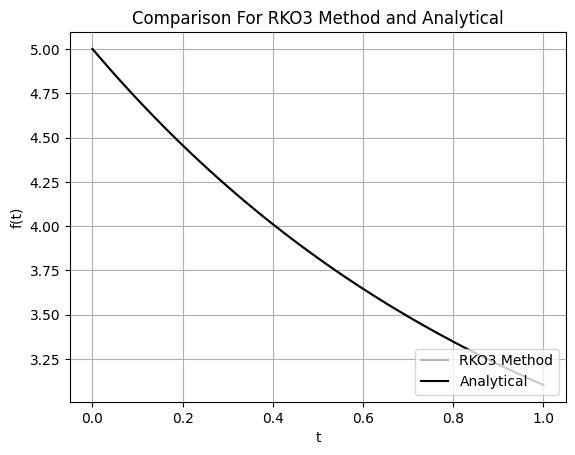

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001728


In [ ]:
rk_03_ordinary_differential_equations_single_order_1(dt=0.02, pr=2)

### Bagian B

In [ ]:
def rk_o6_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y
  f_t=lambda t :2+3*np.exp(-t)
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  k5=np.zeros(len(t))
  k6=np.zeros(len(t))
  y = np.zeros(len(t))
  y_t =np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  for j in range(len(t)-1):
    k1[j+1]=f(t[j], y[j])
    k2[j+1]=f(t[j]+0.25*dt, y[j]+k1[j+1]*dt*0.25)
    k3[j+1]=f(t[j]+0.25*dt, y[j]+k1[j+1]*dt*0.125+k2[j+1]*dt*0.125)
    k4[j+1]=f(t[j]+0.5*dt, y[j]+k2[j+1]*dt*0.5+k3[j+1]*dt)
    k5[j+1]=f(t[j]+0.75*dt, y[j]+k1[j+1]*dt*3/16+k4[j+1]*dt*9/16)
    k6[j+1]=f(t[j+1], k1[j+1]*dt*3/7+k2[j+1]*dt*2/7+k3[j+1]*dt*12/7+k4[j+1]*dt*12/7+k5[j+1]*dt*8/7 )
    y[j+1]=y[j]+(7/90*k1[j+1]+32/90*k3[j+1]+12/90*k4[j+1]+32/90*k5[j+1]+7/90*k6[j+1])*dt
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e,delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2, k3,k4,k5,k6)),
                    columns =['t','y pred', 'y true', 'error(%)','k1','k2', 'k3', 'k4','k5','k6'])
    display(df)
    plt.plot(t, y, '0.7', label='RKO6')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For RKO6 Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y pred,y true,error(%),k1,k2,k3,k4,k5,k6
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,4.948922,4.940596,0.168519,-3.000000,-2.985000,-2.985037,-2.910449,-2.956007,2.312468
2,0.04,4.898766,4.882368,0.335863,-2.948922,-2.934177,-2.934214,-2.860896,-2.905678,2.307148
3,0.06,4.849517,4.825294,0.502006,-2.898766,-2.884273,-2.884309,-2.812237,-2.856258,2.301924
4,0.08,4.801157,4.769349,0.666923,-2.849517,-2.835269,-2.835305,-2.764458,-2.807731,2.296795
5,0.10,4.753671,4.714512,0.830590,-2.801157,-2.787151,-2.787186,-2.717542,-2.760080,2.291758
6,0.12,4.707042,4.660761,0.992983,-2.753671,-2.739902,-2.739937,-2.671473,-2.713290,2.286812
7,0.14,4.661255,4.608075,1.154078,-2.707042,-2.693507,-2.693540,-2.626236,-2.667345,2.281955
8,0.16,4.616296,4.556431,1.313852,-2.661255,-2.647949,-2.647982,-2.581816,-2.622230,2.277186
9,0.18,4.572149,4.505811,1.472282,-2.616296,-2.603215,-2.603247,-2.538199,-2.577930,2.272503


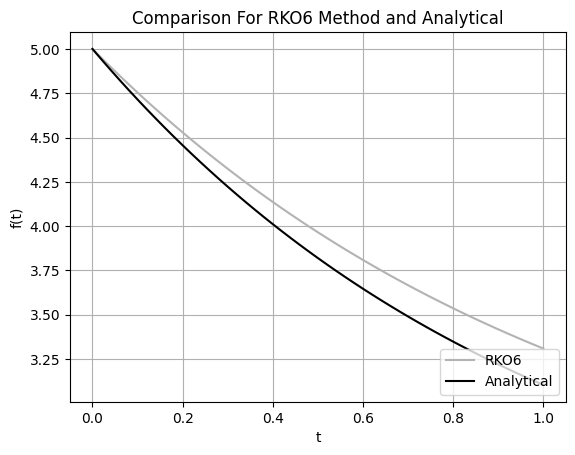

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001235


In [ ]:
rk_o6_ordinary_differential_equations_single_order_1(dt=0.02, pr=2)

### Bagian C

#### Analitik dan Euler

In [ ]:
#defined variable
def euler_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_pred
        y[j+1]=y[j]+f(t[j], y[j])*dt
        #calculate error
        e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)
    if pr==1:
      return t, y_t, y, e, delta_time
    else :
      df = pd.DataFrame(list(zip(t, y, y_t, e)),
                  columns =['t','y pred', 'y true', 'error(%)'])
      display(df)
      plt.plot(t, y, '0.8', label='Euler Method')
      plt.plot(t, y_t, 'k', label='Analytical')
      plt.title('Comparison For Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


#### Modified Euler


In [ ]:
#defined variable
def modified_euler_ordinary_differential_equations_single_order_1(dt=0.1, eps=1.0, pr=2):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    ep = np.zeros(len(t))
    k = np.zeros(len(t))
    yp=np.zeros(len(t))
    dif=np.zeros(len(t))
    dif_p=np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    k[0]=0

    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_k
        yp[j+1]=y[j]+f(t[j], y[j])*dt
        ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
        yk = [y[j]+(f(t[j], y[j])+f(t[j+1], yp[j+1]))*dt*0.5] # inisiasi y korektor
        e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
        dif[j+1]=np.abs(yk[-1]-yp[j+1])
        while dif[j+1]>eps:
          yk.append(y[j]+(f(t[j], y[j])+f(t[j+1], yk[-1]))*dt*0.5)
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
          dif[j+1]=np.abs(yk[-1]-yk[-2])

        k[j+1]=len(yk)
        y[j+1]=yk[-1]
        ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100

        #calculate error
        # e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)
    if pr==1:
      return t, y_t, y, e, ep, delta_time
    else:
      df = pd.DataFrame(list(zip(t, y,yp, y_t, dif, e,ep, k)),
                    columns =['t','y','y_pred', 'y true','dif', 'error(%)','error_p(%)', 'n_kor'])
      display(df)
      plt.plot(t, y, '0.7', label='Modified Euler Method')
      plt.plot(t, y_t, 'k', label='Analytical')
      plt.title('Comparison For Modified Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


#### RKO2

In [ ]:
def rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=2):
  #defined variable
  start_time = time.monotonic()
   #delta time
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j+1], y[j]+k1[j+1]*dt)#calculate k2
      y[j+1]=y[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y_t,y,e,k1,k2)),
                  columns =['t','y true','y pred','error(%)','k1','k2'])
    display(df)
    plt.plot(t, y, '0.8', label='RKO2 Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For RKO2 Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

#### RKO4

In [ ]:
def rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j]+dt/2, y[j]+k1[j+1]*dt/2)#calculate k2
      k3[j+1]=f(t[j]+dt/2, y[j]+k2[j+1]*dt/2)#calculate k2#calculate k3
      k4[j+1]=f(t[j+1], y[j]+k3[j+1]*dt)#calculate k2#calculate k3#calculate k4
      y[j+1]=y[j]+(k1[j+1]+2*k2[j+1]+2*k3[j+1]+k4[j+1])*dt/6 #calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y,e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2,k3,k4)),
                  columns =['t','y pred', 'y true', 'error(%)','k1','k2','k3','k4'])
    display(df)
    plt.plot(t, y, '0.7', label='RKO4 Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For RKO4 Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


#### Perbandingan

In [ ]:
t,y_t,y_euler,e_euler,delta_time_euler=euler_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
# _, _,y_adamb,e_adamb,delta_time_adamb=adam_bashworth_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_, _, y_modified_euler, e_modified_euler,_,delta_time_modified_euler=modified_euler_ordinary_differential_equations_single_order_1(dt=0.02, eps=0.0005, pr=1)
_, _, y_rko2, e_rko2,delta_time_rko2=rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=1)
_, _, y_rko4, e_rko4,delta_time_rko4=rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_,_,y_rko3,e_rko3,delta_time_rko3=rk_03_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_,_,y_rko6,e_rko6,delta_time_rko6=rk_o6_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)


In [ ]:
df = pd.DataFrame(list(zip(t, y_t, y_euler,y_modified_euler,y_rko2,y_rko3, y_rko4,y_rko6,\
                               e_euler,e_modified_euler,e_rko2,e_rko3, e_rko4,e_rko6)),
                  columns =['t','y true', 'y euler','y modified euler','y rko2', 'y rko3', 'y rko4','y rko6'\
                              ,'e euler','e modified euler','e rko2', 'e rko3', 'e rko4','e rko6'])

In [ ]:
display(df)

,t,y true,y euler,y modified euler,y rko2,y rko3,y rko4,y rko6,e euler,e modified euler,e rko2,e rko3,e rko4,e rko6
0,0.00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,0.02,4.940596,4.940000,4.940594,4.940600,4.940598,4.940596,4.948922,0.012064,0.000041,0.000081,0.000040,1.613863e-09,0.168519
2,0.04,4.882368,4.881200,4.882364,4.882376,4.882372,4.882368,4.898766,0.023929,0.000081,0.000160,0.000080,3.201531e-09,0.335863
3,0.06,4.825294,4.823576,4.825288,4.825305,4.825299,4.825294,4.849517,0.035596,0.000121,0.000238,0.000118,4.762887e-09,0.502006
4,0.08,4.769349,4.767104,4.769341,4.769364,4.769356,4.769349,4.801157,0.047062,0.000160,0.000314,0.000156,6.297765e-09,0.666923
5,0.10,4.714512,4.711762,4.714503,4.714531,4.714521,4.714512,4.753671,0.058328,0.000198,0.000390,0.000194,7.806078e-09,0.830590
6,0.12,4.660761,4.657527,4.660750,4.660783,4.660772,4.660761,4.707042,0.069391,0.000235,0.000464,0.000231,9.287704e-09,0.992983
7,0.14,4.608075,4.604377,4.608062,4.608099,4.608087,4.608075,4.661255,0.080253,0.000272,0.000536,0.000267,1.074254e-08,1.154078
8,0.16,4.556431,4.552289,4.556417,4.556459,4.556445,4.556431,4.616296,0.090911,0.000308,0.000608,0.000302,1.217048e-08,1.313852
9,0.18,4.505811,4.501243,4.505795,4.505841,4.505826,4.505811,4.572149,0.101366,0.000344,0.000677,0.000337,1.357145e-08,1.472282


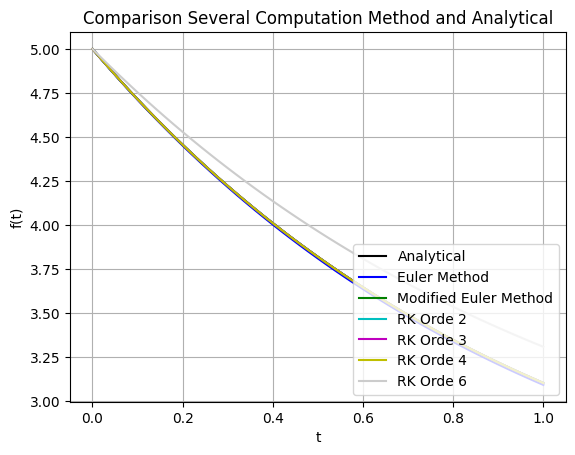

In [ ]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko3, 'm', label='RK Orde 3')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
plt.plot(t, y_rko6, '0.8', label='RK Orde 6')
plt.title('Comparison Several Computation Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

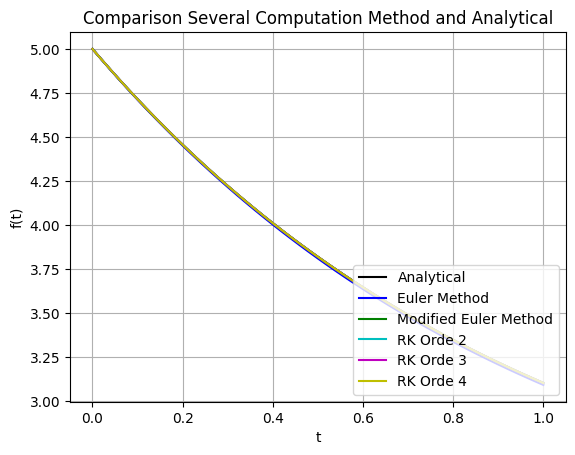

In [ ]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko3, 'm', label='RK Orde 3')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
# plt.plot(t, y_rko6, '0.8', label='RK Orde 6')
plt.title('Comparison Several Computation Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

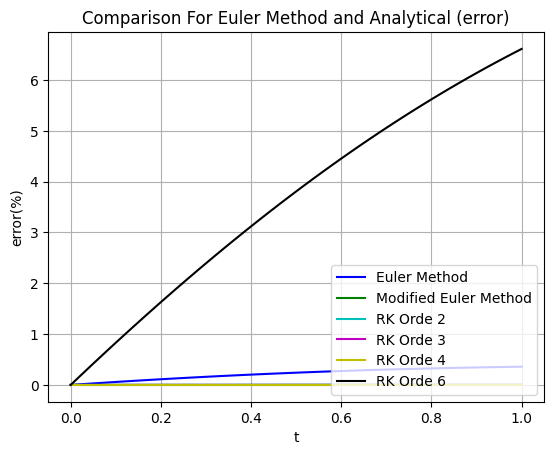

In [ ]:
# plt.plot(t, e_t, 'k', label='Analytical')
plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko3, 'm', label='RK Orde 3')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
plt.plot(t, e_rko6, 'k', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical (error)')
plt.xlabel('t')
plt.ylabel('error(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

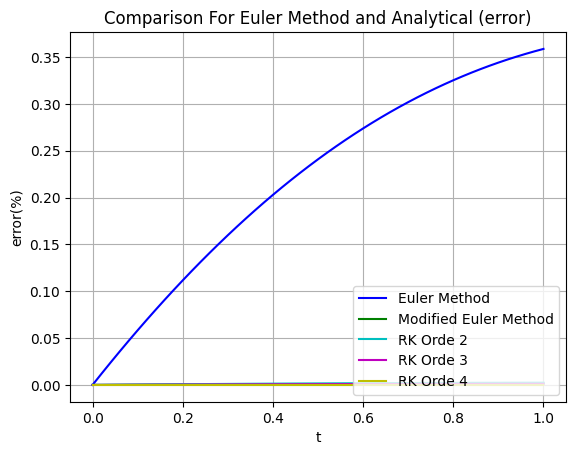

In [ ]:
# plt.plot(t, e_t, 'k', label='Analytical')
plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko3, 'm', label='RK Orde 3')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
# plt.plot(t, e_rko6, 'k', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical (error)')
plt.xlabel('t')
plt.ylabel('error(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

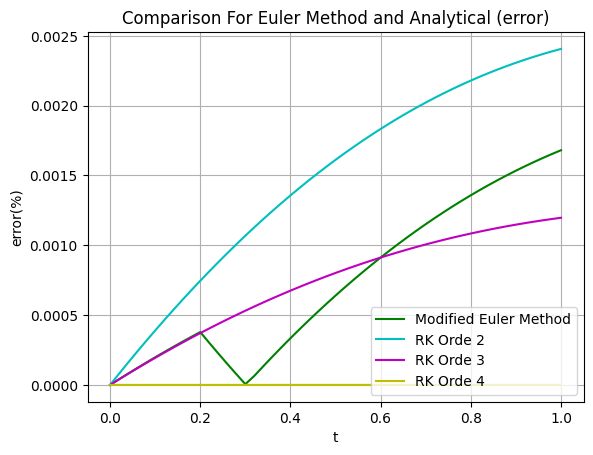

In [ ]:
# plt.plot(t, e_t, 'k', label='Analytical')
# plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko3, 'm', label='RK Orde 3')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
# plt.plot(t, e_rko6, 'k', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical (error)')
plt.xlabel('t')
plt.ylabel('error(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

In [ ]:
lst=[e_euler,e_modified_euler,e_rko2,e_rko3, e_rko4,e_rko6]
name_lst=['Euler', 'modified euler', 'Runge Kutta Orde 2', 'Runge Kutta Orde 3', 'Runge Kutta Orde 4', 'Runge Kutta Orde 6']
delta_time_lst=[delta_time_euler, delta_time_modified_euler, delta_time_rko2, delta_time_rko3, delta_time_rko4, delta_time_rko6]
delta_time_lst=[i.microseconds for i in delta_time_lst]
for i, lst_i in enumerate(lst):
  mean=np.mean(lst_i)
  median=np.median(lst_i)
  max=np.max(lst_i)
  print('{} method have \nmean: {}\nmedian: {}\nmax: {}\ntime to execute: {}\n'.format(name_lst[i], mean, median, max, delta_time_lst[i]))



Euler method have 
mean: 0.21932176094485345
median: 0.2408055585896808
max: 0.3585882790741312
time to execute: 2067

modified euler method have 
mean: 0.0007386475153967634
median: 0.0006399456393990004
max: 0.0016809603305274284
time to execute: 1137

Runge Kutta Orde 2 method have 
mean: 0.0014692246415655443
median: 0.001611983198840056
max: 0.00240655881607969
time to execute: 559

Runge Kutta Orde 3 method have 
mean: 0.0007309278695219672
median: 0.0008019510728609399
max: 0.001197237054347412
time to execute: 651

Runge Kutta Orde 4 method have 
mean: 2.9432788873601497e-08
median: 3.229280368697513e-08
max: 4.8209698416806334e-08
time to execute: 766

Runge Kutta Orde 6 method have 
mean: 3.632590409045931
median: 3.807957628651034
max: 6.612786309896011
time to execute: 5939



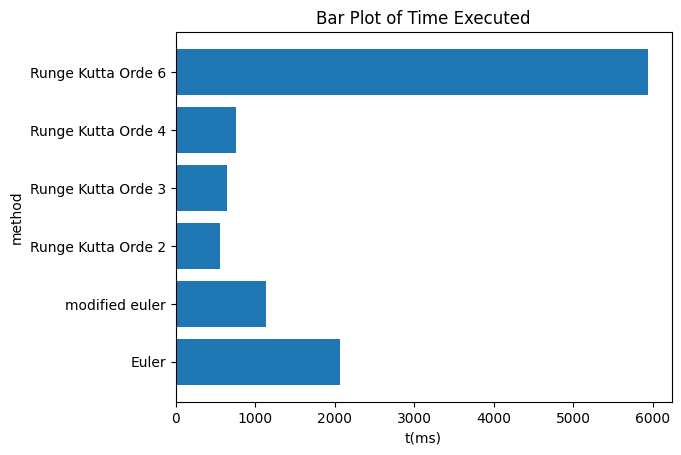

In [ ]:
plt.barh(name_lst, delta_time_lst)

plt.title('Bar Plot of Time Executed')
plt.xlabel('t(ms)')
plt.ylabel('method')
# plt.grid()
# plt.legend(loc='lower right')
plt.show()